In [6]:
using Pkg
Pkg.activate("rad_transfer"; shared=true)
using RadiativeTransfer
using RadiativeTransfer.CrossSection
using KernelAbstractions
using ..Architectures
using Pkg.Artifacts
using ProgressMeter
using DataStructures
using PyPlot
using CUDA
using Flux
using NetCDF
using NCDatasets
using Dates

include("julia_cs_matrix_helper.jl")
# include("/home/cchristo/proj_christian/RadiativeTransfer.jl/src/CrossSection/types.jl")


 Activating environment at `~/.julia/environments/rad_transfer/Project.toml`
 Activating environment at `~/.julia/environments/rad_transfer/Project.toml`


get_cross_section_matrix (generic function with 1 method)

In [7]:
# reanalysis_file_path = "/export/data2/groupMembers/cchristo/reanalysis_3d/merra2/2015/01/MERRA2_400.tavg3_3d_asm_Nv.20150101.nc4"
# fluo
# ave_reanalysis_file_path = "/export/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/profile_djf_week.nc"

# tofu
ave_reanalysis_file_path = "/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/profile_djf_week.nc"

# all profiles - tofu
profile_ts_file_path = "/net/fluo/data2/groupMembers/cchristo/profiles/summit_merra/summit_all.nc"


"/net/fluo/data2/groupMembers/cchristo/profiles/summit_merra/summit_all.nc"

In [8]:
# open hitran tables
hitran_data_CO2 = read_hitran("hitran_molec_id_2_CO2.tar", mol=2, iso=1, ν_min=400, ν_max=2100)
hitran_data_H2O = read_hitran("hitran_molec_id_1_H2O.tar", mol=1, iso=1, ν_min=400, ν_max=2100)
hitran_data_CH4 = read_hitran("hitran_molec_id_6_CH4.tar", mol=6, iso=1, ν_min=400, ν_max=2100)

# open profile timeseries
ds = Dataset(profile_ts_file_path) ;

In [30]:
# ds["T"][:,2]
# time_ii
ds["time"][1260]


2011-06-07T10:30:00

In [72]:
for time_i in 1:1 #length(ds["time"])
    display(time_i)
    T = ds["T"][:,time_i]
    P = ds["PL"][:,time_i]
    time_ii = ds["time"][time_i]
    # (lon, lat, z, time)
    var_array_sizes = size(T)
    
    # define grids 
    ν_grid = 400:0.01:2099.99
    p_grid = P[:] / 100
    t_grid = T[:]
    
    # compute cs matrix
    CO2_cs_matrix_cuda = get_cross_section_matrix(hitran_data_CO2, ν_grid, p_grid, t_grid)
    H2O_cs_matrix_cuda = get_cross_section_matrix(hitran_data_H2O, ν_grid, p_grid, t_grid)
    CH4_cs_matrix_cuda = get_cross_section_matrix(hitran_data_CH4, ν_grid, p_grid, t_grid)
    
    # convert to regular array
    CO2_cs_matrix = convert(Array, CO2_cs_matrix_cuda)
    H2O_cs_matrix = convert(Array, H2O_cs_matrix_cuda)
    CH4_cs_matrix = convert(Array, CH4_cs_matrix_cuda)
    
    
#     display(P_prof)
#     plot(p_grid)
    
end

1

## Open Profile and Extract Profile for a Time

In [49]:
# # ds = ncread(reanalysis_file_path)
# ds = Dataset(ave_reanalysis_file_path)

# # times = ds["time"][:] 
# lats = ds["lat"][:]
# lons = ds["lon"][:]
# T = ds["T"][:]
# P = ds["PL"][:]
# # (lon, lat, z, time)
# var_array_sizes = size(T)

# T_prof = T[:]
# P_prof = P[:] / 100

# OLD

In [20]:
# ncinfo(reanalysis_file_path)
desired_lat = 72.5796
desired_lon = -38.4588

# find index of nearest gridcell
lat_ind = argmin(broadcast(abs, lats .- desired_lat))
lon_ind = argmin(broadcast(abs, lons .- desired_lon))

# set time ind
time_ind = 1

T_prof = T[lat_ind,lon_ind, :,time_ind]
P_prof = P[lat_ind,lon_ind, :,time_ind]

1-element Array{Union{Missing, Float32},1}:
 1.5000001f0

In [75]:
ds = Dataset(ave_reanalysis_file_path)

# times = ds["time"][:] 
lats = ds["lat"][:]
lons = ds["lon"][:]
T = ds["T"][:]
P = ds["PL"][:]
# (lon, lat, z, time)
var_array_sizes = size(T)

T_prof = T[:]
P_prof = P[:] / 100

72-element Array{Float32,1}:
   0.0150000015
   0.02635001
   0.040142514
   0.05679252
   0.077672526
   0.10452403
   0.13959901
   0.18542203
   0.24493755
   0.32178348
   0.4204236
   0.54629266
   0.70595664
   ⋮
 563.6065
 571.22
 578.80804
 586.39575
 593.98065
 601.5559
 609.1061
 616.6516
 624.19116
 631.7227
 639.24445
 647.8926

In [5]:
# fetch('H2O_S',1,1,xmin,xmax)
# fetch('CO2_S',2,1,xmin,xmax)
# fetch('CH4_S',6,1,xmin,xmax)

In [76]:
hitran_data_CO2 = read_hitran("hitran_molec_id_2_CO2.tar", mol=2, iso=1, ν_min=400, ν_max=2100)
hitran_data_H2O = read_hitran("hitran_molec_id_1_H2O.tar", mol=1, iso=1, ν_min=400, ν_max=2100)
hitran_data_CH4 = read_hitran("hitran_molec_id_6_CH4.tar", mol=6, iso=1, ν_min=400, ν_max=2100)

HitranTable{Float64}
  mol: Array{Int64}((58893,)) [6, 6, 6, 6, 6, 6, 6, 6, 6, 6  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
  iso: Array{Int64}((58893,)) [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  νᵢ: Array{Float64}((58893,)) [400.416314, 400.500621, 400.515163, 400.545478, 400.783489, 400.847081, 400.941244, 401.101872, 401.494615, 401.738456  …  2098.001522, 2098.224403, 2098.558601, 2099.174328, 2099.274806, 2099.389535, 2099.440549, 2099.731408, 2099.87477, 2099.931237]
  Sᵢ: Array{Float64}((58893,)) [2.055e-30, 2.836e-30, 2.834e-30, 3.576e-30, 6.418e-30, 1.242e-30, 2.422e-30, 1.379e-30, 1.891e-30, 1.795e-30  …  8.137e-28, 1.592e-27, 7.599e-29, 9.206e-29, 3.743e-29, 6.561e-29, 5.98e-29, 7.884e-28, 5.626e-28, 2.94e-29]
  Aᵢ: Array{Float64}((58893,)) [1.727e-7, 1.481e-5, 1.568e-6, 1.997e-7, 6.715e-7, 1.102e-8, 2.125e-8, 1.21e-8, 1.572e-6, 0.001561  …  0.04187, 0.04916, 0.003913, 0.004716, 0.001916, 0.003381, 0.003082, 0.04041, 0.04324, 0.001502]
  γ_air: Array{Float64}(

In [77]:
# compute_absorption_cross_section(hitran_data_CO2, Voigt(), 
#                                 collect(ν_grid), p_grid[10], t_grid[10], 
#                                 CEF=HumlicekWeidemann32SDErrorFunction(),
#                                 architecture=Architectures.GPU())

In [15]:
# Architectures.GPU()
# cs_matrix = zeros(Float64,length(p_grid), length(ν_grid)) |> gpu ;
# cs_matrix

In [78]:
# @time compute_absorption_cross_section(hitran_data_H2O, Voigt(), collect(ν_grid), p_grid[10], t_grid[10], 
#     wing_cutoff = 10, architecture=Architectures.CPU())

In [ ]:
@time begin
model_interp = make_interpolation_model(hitran_data_CO2, Voigt(), ν_grid, pressures, temperatures)
    
end

Computing Cross Sections for Interpolation... 20%|█▎    |  ETA: 0:03:14

In [79]:
ν_grid = 400:0.01:2099.99
p_grid = P_prof[:]
t_grid = T_prof[:]

72-element Array{Union{Missing, Float32},1}:
 202.94925f0
 207.71889f0
 217.35593f0
 226.02596f0
 231.42293f0
 236.14986f0
 241.20515f0
 245.34897f0
 247.8092f0
 250.66423f0
 255.77087f0
 259.24652f0
 263.36966f0
   ⋮
 240.66661f0
 241.12915f0
 241.60477f0
 242.0822f0
 242.54677f0
 242.99382f0
 243.38539f0
 243.70296f0
 244.0438f0
 243.74142f0
 244.11185f0
 237.36955f0

In [7]:
# @time begin
# CO2_cs_matrix = get_cross_section_matrix(hitran_data_CO2, ν_grid, p_grid, t_grid)
# end
# cs_matrix = zeros(length(p_grid), length(ν_grid)) |> gpu
# zeros

In [80]:
# include("julia_cs_matrix_helper.jl")
CO2_cs_matrix_cuda = get_cross_section_matrix(hitran_data_CO2, ν_grid, p_grid, t_grid)
H2O_cs_matrix_cuda = get_cross_section_matrix(hitran_data_H2O, ν_grid, p_grid, t_grid)
CH4_cs_matrix_cuda = get_cross_section_matrix(hitran_data_CH4, ν_grid, p_grid, t_grid)

Computing Cross Sections for Interpolation...100%|██████| Time: 0:00:56
Computing Cross Sections for Interpolation...100%|██████| Time: 0:00:13
Computing Cross Sections for Interpolation...100%|██████| Time: 0:01:11


72×170000 CuArray{Float32,2}:
 5.84833f-36  5.86663f-36  5.88538f-36  …  3.55886f-35  2.94926f-35
 1.3214f-35   1.32563f-35  1.32996f-35     9.88318f-35  8.19021f-35
 3.22937f-35  3.24017f-35  3.25126f-35     3.56091f-34  2.95087f-34
 6.73922f-35  6.76274f-35  6.78696f-35     1.02292f-33  8.47664f-34
 1.15598f-34  1.16013f-34  1.16441f-34     2.11339f-33  1.75128f-33
 1.8802f-34   1.88713f-34  1.89426f-34  …  4.01524f-33  3.32723f-33
 3.04937f-34  3.06091f-34  3.07282f-34     7.63244f-33  6.32455f-33
 4.72033f-34  4.73862f-34  4.75751f-34     1.33836f-32  1.10901f-32
 6.81201f-34  6.83878f-34  6.86643f-34     2.07517f-32  1.71954f-32
 9.89483f-34  9.93436f-34  9.97521f-34     3.26952f-32  2.70921f-32
 1.5387f-33   1.54503f-33  1.55158f-33  …  5.84898f-32  4.84655f-32
 2.24229f-33  2.25171f-33  2.26146f-33     9.34138f-32  7.74035f-32
 3.30732f-33  3.32157f-33  3.33631f-33     1.53023f-31  1.26795f-31
 ⋮                                      ⋱               
 1.20628f-30  1.21082f-30  1.

In [81]:
CO2_cs_matrix = convert(Array, CO2_cs_matrix_cuda)
H2O_cs_matrix = convert(Array, H2O_cs_matrix_cuda)
CH4_cs_matrix = convert(Array, CH4_cs_matrix_cuda)

72×170000 Array{Float32,2}:
 5.84833f-36  5.86663f-36  5.88538f-36  …  3.55886f-35  2.94926f-35
 1.3214f-35   1.32563f-35  1.32996f-35     9.88318f-35  8.19021f-35
 3.22937f-35  3.24017f-35  3.25126f-35     3.56091f-34  2.95087f-34
 6.73922f-35  6.76274f-35  6.78696f-35     1.02292f-33  8.47664f-34
 1.15598f-34  1.16013f-34  1.16441f-34     2.11339f-33  1.75128f-33
 1.8802f-34   1.88713f-34  1.89426f-34  …  4.01524f-33  3.32723f-33
 3.04937f-34  3.06091f-34  3.07282f-34     7.63244f-33  6.32455f-33
 4.72033f-34  4.73862f-34  4.75751f-34     1.33836f-32  1.10901f-32
 6.81201f-34  6.83878f-34  6.86643f-34     2.07517f-32  1.71954f-32
 9.89483f-34  9.93436f-34  9.97521f-34     3.26952f-32  2.70921f-32
 1.5387f-33   1.54503f-33  1.55158f-33  …  5.84898f-32  4.84655f-32
 2.24229f-33  2.25171f-33  2.26146f-33     9.34138f-32  7.74035f-32
 3.30732f-33  3.32157f-33  3.33631f-33     1.53023f-31  1.26795f-31
 ⋮                                      ⋱               
 1.20628f-30  1.21082f-30  1.21

In [89]:
time_ii = ds2["time"][1]

2011-01-01T01:30:00

In [157]:
time_ii

2011-01-01T01:30:00

In [180]:
# Dates.DateTime


"2011/cs_matrix_20110101_0130.nc"

In [183]:
fname = string(year(time_ii),"/cs_matrix_",year(time_ii), lpad(month(time_ii),2, "0"), lpad(day(time_ii),2,"0"), 
    "_", lpad(hour(time_ii),2,"0"), lpad(minute(time_ii),2,"0"), ".nc")

rel_path_name = "/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit/julia_generated/"
out_file_path = string(rel_path_name, fname)


"/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit/julia_generated/2011/cs_matrix_20110101_0130.nc"

In [131]:
# out_file_path = "/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week_julia_test4.nc"
ds_out = Dataset(out_file_path,"c")

nu_dim = defDim(ds_out,"nu", size(ν_grid)[1])
pres_dim = defDim(ds_out,"pressure", size(p_grid)[1])
# time_dim = defDim(ds_out,"time", 1)



# Define the variables temperature with the attribute units
CO2_cs_matrix_var = defVar(ds_out,"cs_matrix_co2", Float32, ("pressure", "nu"))
H2O_cs_matrix_var = defVar(ds_out, "cs_matrix_h2o", Float32, ("pressure", "nu"))
CH4_cs_matrix_var = defVar(ds_out,"cs_matrix_ch4", Float32, ("pressure", "nu"))
# time_var = defVar(ds_out,"time_ii", Dates.DateTime, ("time",))
# nu_coord = defVar(ds_out,"nu", Float32, ("nu",))
# pres_coord = defVar(ds_out,"pressure", Float32, ("pressure",))
# nu_coord = coord(ds_out,"nu", Float64, ("nu"))

CO2_cs_matrix_var[:,:] = CO2_cs_matrix
H2O_cs_matrix_var[:,:] = H2O_cs_matrix
CH4_cs_matrix_var[:,:] = CH4_cs_matrix
# time_var[:] = time_ii

# nu_coord[:] = collect(ν_grid)
# pres_coord[:] = p_grid


close(ds_out)

NCDatasets.NetCDFError: NetCDF error: Permission denied (NetCDF error code: 13)

In [6]:
# CO2_cs_matrix_var

In [151]:
# broadcast(max,CO2_cs_matrix)
findmax(CO2_cs_matrix)

(1.2424183217493597e-16, CartesianIndex(1, 26801))

In [152]:
findmin(CO2_cs_matrix)

(0.0, CartesianIndex(2, 1))

In [26]:
findmin(H2O_cs_matrix)

(7.920756f-33, CartesianIndex(1, 59206))

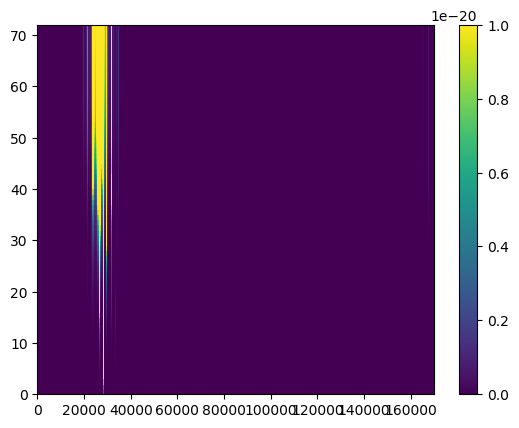

PyObject <matplotlib.colorbar.Colorbar object at 0x7f65d733dba8>

In [16]:
pcolormesh(CO2_cs_matrix, vmax = 10^-20)
colorbar()